In [1]:
#CHDIR COMMAND ONLY FOR JUPYTER
import os
import sys
sys.path.append("/home/henryrpg/Desktop/N3AS/Emu_scripts/data_reduction")
import yt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import h5py
import amrex_plot_tools as amrex
import emu_yt_module as emu
import spin_flip_tools as sft
import glob
import concurrent

import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,LogLocator)
from matplotlib import cm, colors
import matplotlib.axes as ax
from mpl_toolkits.mplot3d import Axes3D
import latex

# For ease of development, reload the relevant modules to make sure they are up to date.
import importlib
importlib.reload(sft)

<module 'spin_flip_tools' from '/home/henryrpg/Desktop/N3AS/Emu_scripts/data_reduction/spin_flip_tools.py'>

In [2]:
#insert name of data directory and the desired basis. Supports h5 files and directories of 'pltXXXXX' files (which should be named with a fwd slash at the end)
data_base_directory = "/home/henryrpg/Desktop/N3AS/data/critpoint2.h5"

basis_theta = 0
basis_phi = 0 

In [403]:
H_LR1

array([[ 3.33268309e-13-0.00000000e+00j, -8.94505484e-16-8.05416355e-16j],
       [-8.94505484e-16+8.05416355e-16j,  1.60571236e-13-0.00000000e+00j]])

In [ ]:
#Runs interact
if data_base_directory[-3:]=='.h5': #runs interact for h5 files, outputs [filename]_spin_flip_matrices.h5 in same location
    
    output_filename = data_base_directory[0:-3]+'_spin_flip_matrices_zdirr.h5'
    
    F=h5py.File(data_base_directory,"r")
    nt=len(np.array(F["t(s)"]))
    F.close()

    for t in range(0,nt):
        sft.interact(data_base_directory, output_filename, basis_theta, basis_phi, t)
        
else: #runs interact, for plt files. outputs h5 'spin_flip_matrices' file inside of data_base_directory
    
    directory_list = sorted(glob.glob(data_base_directory+"plt*"))
    output_filename = data_base_directory + "spin_flip_matrices.h5"

    if os.path.exists(output_filename):
        os.remove(output_filename)

    for d in directory_list:
        print(d)
        with concurrent.futures.ProcessPoolExecutor(max_workers=1) as executor:
            executor.submit(sft.interact, d, output_filename, basis_theta, basis_phi)
    
    

In [5]:
#if skipping the above: set output_filename as the loc of the (already generated) h5 dataset you want to look at

#output_filename=

#extract calculated data, show the datasets
# note - us|e h5ls in the terminal to peek inside a hdf5 file
data =  h5py.File(output_filename, "r") 
list(data.keys())

NameError: name 'output_filename' is not defined

In [6]:
#adds GM components of flux


GM_data = sft.GM_components(data) 
data.close()
data_append =  h5py.File(output_filename, "a")
sft.append_to_hdf5(data_append, "GM(eV^3)", GM_data)
data = h5py.File(output_filename, "r")

NameError: name 'data' is not defined

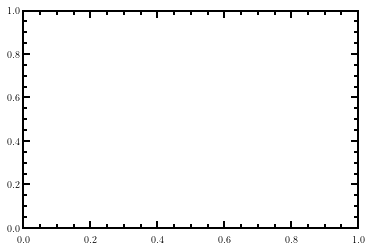

In [7]:
################
# plot options #
################
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex=True)
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth'] = 2
mpl.pyplot.tick_params(axis='both',which="both", direction="in",top=True,right=True)

mpl.pyplot.minorticks_on()

In [8]:
# for plots: choose 'basis' as your basis component (either 0,1,2, or 3) and 'data' as your read-permission h5 dataset

basis=2

data = h5py.File("/home/henryrpg/Desktop/N3AS/data/ideal_pt1_spin_flip_matrices_zdirr.h5", "r") 

KeyError: "Unable to open object (object 'GM(eV^3)R' doesn't exist)"

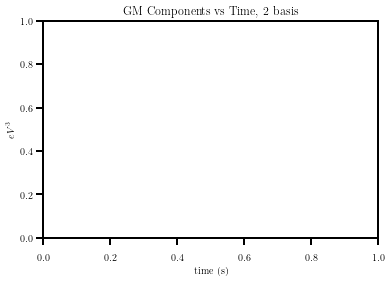

In [9]:
#plots flux GM components along chosen basis component
t = np.array(data["t(s)"])
plt.xlabel("time (s)")
plt.ylabel(r"$eV^3$")
plt.title('GM Components vs Time, '+str(basis)+ " basis")    
plt.plot(t,np.average(np.absolute(sft.total(data, 'GM(eV^3)')[0][:,basis,:,:]), axis=1),label=[str(k)for k in range(0,8)])
plt.legend()
plt.grid()

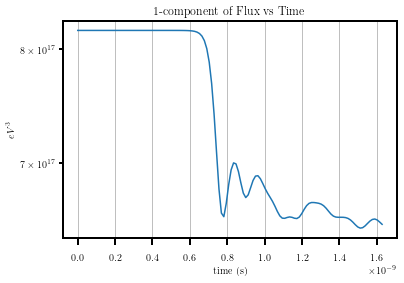

In [10]:
#plots [basis] component of Flux 
J=sft.total(data,"J(eV^3)")
t = np.array(data["t(s)"])
plt.xlabel("time (s)")
plt.ylabel(r"$eV^3$")
plt.title('1'+'-component of Flux vs Time')    
plt.semilogy(t,np.average(sft.scalarfunc_time(J[:,3,:,:,:]), axis=1))
plt.grid()

In [ ]:
#plots [basis] component of Flux 
J=sft.total(data,"J(eV^3)")
t = np.array(data["t(s)"])
plt.xlabel("time (s)")
plt.ylabel(r"$eV^3$")
plt.title(str(basis)+'-component of Flux vs Time')    
plt.semilogy(t,np.average(sft.scalarfunc_time(J[:,2,:,:,:]), axis=1))
plt.grid()

In [4]:
#plots H_LR
H_LR=sft.total(data,"H_LR(eV)")
t = np.array(data["t(s)"])
plt.xlabel("time (ns)")
plt.ylabel(r"$|H_{LR}| \ \ (eV)$")
#plt.ylim(1e-17,5e-13)
#plt.xlim(0,0.4)
#plt.title('Spin-Flip Hamiltionian Component during Fast Flavor Instability')    
plt.semilogy(10**9*t,np.average(sft.scalarfunc_time(H_LR[:,:,:,:]), axis=1))
plt.fill_between([0.11,0.28], 0, 1e-12, alpha=0.5, color='yellow')
proxy = [plt.Rectangle((1, 1), 2, 2, fc='yellow')]
mpl.pyplot.tick_params(axis='both',which="both", direction="in",top=True,right=True)
mpl.pyplot.minorticks_on()

plt.legend(proxy, ["Instability"], loc='upper left')
plt.grid()
plt.savefig('../H_LR.png', dpi=300)

NameError: name 'data' is not defined

In [ ]:
#plots the kappa component of the potential
kappa=sft.total(data,'S_R_kappa(eV)')
t = np.array(data["t(s)"])
plt.xlabel("time (s)")
plt.ylabel(r"$eV$")
plt.title('Kappa Component of Potential vs Time')    
plt.plot(t,np.average(kappa[:,0,0,:], axis=1))
plt.grid()
plt.savefig('../kappa.png', dpi=300)

In [ ]:
np.shape(kappa)

In [ ]:
#Plots neutrino-neutrino + vacuum part of diagonal component 
H_vv=sft.total(data,'H_Rz(eV)')
t = np.array(data["t(s)"])
plt.xlabel("time (s)")
plt.ylabel(r"$eV$")
plt.title(r'$H_{\nu\nu}+H_m$ vs Time')    
plt.plot(t,np.average(sft.scalarfunc_time(H_vv[:,:,:,:]), axis=1))
plt.grid()

In [ ]:
#Plots neutrino-neutrino + vacuum part of diagonal component against space (at time t)
t=0
H_vv=sft.total(data,'H_Rz(eV)')
z = np.array(data["z(cm)"])
plt.xlabel("position (cm)")
plt.ylabel(r"$eV$")
#plt.title('Spin-Flip Hamiltionian Component vs Space at t = '+str(t))    
plt.plot(z,H_vv[t,0,0,:])
plt.grid()

In [ ]:


















#MERGER GRID FUNCTIONS: all plots involving 3d grid of data from the supernova merger (Rather than a single simulation)

In [3]:
merger_grid = h5py.File("/home/henryrpg/Desktop/N3AS/data/merger_grid.h5","r")
merger_grid_unrotated = h5py.File("/home/henryrpg/Desktop/N3AS/data/merger_grid_unrotated.h5","r")
units= h5py.File("/home/henryrpg/Desktop/N3AS/data/units.h5","r")
units.keys()
#grid spacing is 0.67928832684 km

<KeysViewHDF5 ['J_a(erg|ccm)', 'J_e(erg|ccm)', 'J_x(erg|ccm)', 'Ye', 'crossing_discriminant', 'deltaCrossingAngle', 'eddfac_a(1|ccm)', 'eddfac_e(1|ccm)', 'eddfac_x(1|ccm)', 'fluxfac_a(1|ccm)', 'fluxfac_e(1|ccm)', 'fluxfac_x(1|ccm)', 'fn_a(1|ccm)', 'fn_e(1|ccm)', 'fn_x(1|ccm)', 'minerbo_Za', 'minerbo_Ze', 'minerbo_Zx', 'n_a(1|ccm)', 'n_e(1|ccm)', 'n_x(1|ccm)', 'rho(g|ccm)', 'x(cm)', 'y(cm)', 'z(cm)']>

In [4]:
xunits=np.array(units['x(cm)'])
x_km=10**-5*xunits
yunits=np.array(units['y(cm)'])
y_km=10**-5*yunits

In [3]:
x=np.array(merger_grid['x(cm)'])
y=np.array(merger_grid['y(cm)'])
discriminant=np.array(merger_grid['crossing_descriminant'])
discriminant_unrotated=np.array(merger_grid_unrotated['crossing_discriminant'])

positive=np.where(discriminant>=0)
negative=np.where(discriminant<0)

discriminant_sign=np.zeros_like(discriminant)

discriminant_sign[positive]=1
discriminant_sign[negative]=0

NameError: name 'merger_grid' is not defined

In [11]:
G=1.1663787*10**(-23) # eV^-2
c=2.998e+10 #cm/s
M_p=1.6726219*10**(-24)#grams (Proton mass)
rho=np.array(merger_grid['rho(g|ccm)']) #g/cm^3 (baryon mass density)
Ye=np.array(merger_grid['Ye'])
hbar=6.58211951*10**(-16) #eV s
n_b=rho/M_p*(hbar**3 * c**3)#eV^3 (baryon number density)

In [12]:
#4-component flux vectors for electron neutrinos (e), electron antineutrinos (a), and other neutrinos (x)
#all in eV^3
J_e=(hbar**3 * c**3)*(np.array([merger_grid['n_e(1|ccm)'],
              merger_grid['fn_e(1|ccm)'][0],merger_grid['fn_e(1|ccm)'][1],merger_grid['fn_e(1|ccm)'][2]]))
                      
J_a=(hbar**3 * c**3)*np.array([merger_grid['n_a(1|ccm)'],
              merger_grid['fn_a(1|ccm)'][0],merger_grid['fn_a(1|ccm)'][1],merger_grid['fn_a(1|ccm)'][2]])
                      


In [13]:
J=J_e-J_a

In [14]:
mag_F=np.sqrt(np.sum(J[1:4,:,:,:]**2, axis=0))

In [15]:
H_vv_min=2**(1./2.)*G*(J[0]+mag_F)
H_vv_max=2**(1./2.)*G*(J[0]-mag_F)

resonance_val_max = 2**(-1/2)*G*n_b*(3.*Ye-np.ones_like(Ye))+H_vv_max
resonance_val_min = 2**(-1/2)*G*n_b*(3.*Ye-np.ones_like(Ye))+H_vv_min


In [16]:
positive_resonance=np.where(resonance_val_min>=0)

resonance_sign=np.zeros_like(discriminant)
resonance_sign[positive_resonance]=1

both_conditions=resonance_sign*discriminant_sign

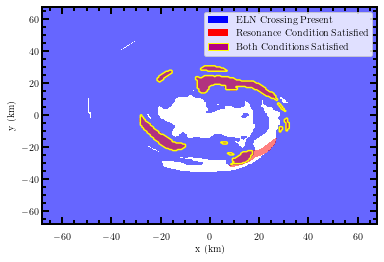

In [20]:
#see cntours at z=zval
zval=95
#colorplot=plt.pcolormesh(x[:,:,zval],y[:,:,zval],discriminant[:,:,zval],cmap=plt.cm.RdYlBu,shading='auto',vmax=0.3,vmin=-0.3)
#plt.colorbar()
cs=plt.contourf(x_km[:,:,zval],y_km[:,:,zval], discriminant_sign[:,:,zval], levels=[0.1,1,2,3], alpha=0.6, colors=['blue','red',[0.65,0,0.25]])
proxy = [plt.Rectangle((1, 1), 2, 2, fc='blue'),plt.Rectangle((1, 1), 2, 2, fc='red'),plt.Rectangle((1, 1), 2, 2, fc=[0.7,0,0.5],ec='yellow')]

plt.legend(proxy, ["ELN Crossing Present", "Resonance Condition Satisfied","Both Conditions Satisfied"])
plt.contourf(x_km[:,:,zval],y_km[:,:,zval],resonance_val_min[:,:,zval], levels=[0,1], alpha=0.5, colors=['red'])
plt.contour(x_km[:,:,zval],y_km[:,:,zval],both_conditions[:,:,zval], levels=[0.5,1], colors=['yellow'] )
mpl.pyplot.tick_params(axis='both',which="both", direction="in",top=True,right=True)
mpl.pyplot.minorticks_on()
plt.xlabel('x (km)')
plt.ylabel('y (km)')
#plt.contour(x[:,:,zval],y[:,:,zval],resonance_val_max[:,:,zval], levels=[0], colors=['blue'] )
#plt.title('Resonance Conditions and ELN Crossing Regions')
plt.savefig('../'+str(zval)+'.png', dpi=300)

In [21]:
#angle-dependent resonance

J_e=(hbar**3 * c**3)*(np.array([merger_grid['n_e(1|ccm)'],
              merger_grid['fn_e(1|ccm)'][0],merger_grid['fn_e(1|ccm)'][1],merger_grid['fn_e(1|ccm)'][2]]))
                      
J_a=(hbar**3 * c**3)*np.array([merger_grid['n_a(1|ccm)'],
              merger_grid['fn_a(1|ccm)'][0],merger_grid['fn_a(1|ccm)'][1],merger_grid['fn_a(1|ccm)'][2]])


J_merger=J_e-J_a




J_eu=(hbar**3 * c**3)*(np.array([merger_grid_unrotated['n_e(1|ccm)'],
              merger_grid_unrotated['fn_e(1|ccm)'][0],merger_grid_unrotated['fn_e(1|ccm)'][1],merger_grid_unrotated['fn_e(1|ccm)'][2]]))
                      
J_au=(hbar**3 * c**3)*np.array([merger_grid_unrotated['n_a(1|ccm)'],
              merger_grid_unrotated['fn_a(1|ccm)'][0],merger_grid_unrotated['fn_a(1|ccm)'][1],merger_grid_unrotated['fn_a(1|ccm)'][2]])


J_u=J_eu-J_au

In [22]:
def resonance_val(J, basis):
   
    #should this be doubled?
    S_R = 2**(1./2.)*G*np.transpose(np.array([[2*J,np.zeros_like(J)],[np.zeros_like(J),J]]),(2,0,1,3,4,5))
    
    S_R_kappa = sft.kappa(S_R,basis)
    
    return np.array(2**(-1/2)*G*n_b*(3.*Ye-np.ones_like(Ye))+S_R_kappa[0,0])
    

In [23]:
def grad_magnitude(J, basis):

    grad=np.gradient(resonance_val(J,basis), 0.67928832684*1e5/(c*hbar))
    projection=np.sum(basis.n_vector[1:4,np.newaxis,np.newaxis,np.newaxis]*grad, axis=0)
    
    return np.array(np.abs(projection))

In [358]:
def H_LR(J, basis):
    M=sft.M_2flavor
    p_abs=10**7
    S_R = 2**(1./2.)*G*np.transpose(np.array([[2*J,np.zeros_like(J)],[np.zeros_like(J),J]]),(2,0,1,3,4,5))
    S_L = -2**(1./2.)*G*np.transpose(np.array([[2*J,np.zeros_like(J)],[np.zeros_like(J),J]]),(2,1,0,3,4,5))
    S_L_minus = sft.minus(S_L, basis)
    S_R_plus = sft.plus(S_R, basis)
    
    MSl = np.transpose(np.array([[[ np.matmul(np.conj(M),S_L_minus[:,:,x,y,z]) for z in range(101) ] for y in range(201)] for x in range(201)]),(3,4,0,1,2))
    SrM = np.transpose(np.array([[[ np.matmul(S_R_plus[:,:,x,y,z],np.conj(M))  for z in range(101) ] for y in range(201)] for x in range(201)]) ,(3,4,0,1,2))
    return (-1/p_abs)*(SrM-MSl)

In [25]:
def adiabaticity(J,basis):
    return np.real((H_LR(J,basis)[0,0]**2)/grad_magnitude(J,basis))

In [31]:
def max_adiab(adiab,z,value):
    maxvals=np.where(adiab>value)
    coordlist=[]
    for n in range(0,len(maxvals[2])):
        if maxvals[2][n]==z:
            coordlist.append([int(maxvals[0][n]),int(maxvals[1][n])])
    
    return np.array(coordlist)

In [33]:
def coords(adiab,z,value):
    maxpoints=max_adiab(adiab,z,value)
    xlist=[x_km[val[0],val[1],z] for val in maxpoints]
    ylist=[y_km[val[0],val[1],z] for val in maxpoints]
    return xlist,ylist

In [140]:
basis=sft.Basis(np.pi/2,0)
H_LR_x=H_LR(J_merger,basis)


In [362]:
H_LR_x[1,1]

array([[[1.27571113e-13-0.j, 1.25948845e-13-0.j, 1.24407926e-13-0.j,
         ..., 1.22127323e-13-0.j, 1.22195506e-13-0.j,
         1.22370158e-13-0.j],
        [1.30164039e-13-0.j, 1.28816460e-13-0.j, 1.27495064e-13-0.j,
         ..., 1.24237922e-13-0.j, 1.24801944e-13-0.j,
         1.25244654e-13-0.j],
        [1.33626805e-13-0.j, 1.32372696e-13-0.j, 1.30721618e-13-0.j,
         ..., 1.26853942e-13-0.j, 1.27317665e-13-0.j,
         1.27979680e-13-0.j],
        ...,
        [2.33027863e-13-0.j, 2.33583572e-13-0.j, 2.33326293e-13-0.j,
         ..., 2.30492444e-13-0.j, 2.28133885e-13-0.j,
         2.25499877e-13-0.j],
        [2.29323322e-13-0.j, 2.29899954e-13-0.j, 2.30049306e-13-0.j,
         ..., 2.26448423e-13-0.j, 2.23953151e-13-0.j,
         2.21608780e-13-0.j],
        [2.25346018e-13-0.j, 2.26044462e-13-0.j, 2.26746699e-13-0.j,
         ..., 2.22539509e-13-0.j, 2.20047972e-13-0.j,
         2.17866051e-13-0.j]],

       [[1.30562625e-13-0.j, 1.28379175e-13-0.j, 1.26465598e-13-0.j

In [27]:
adiabaticity_x_unrotated=adiabaticity(J_u,basis)

In [49]:
basis=sft.Basis(0,0)
gradz=grad_magnitude(J_u, basis)
gradx=grad_magnitude(J_u,sft.Basis(np.pi/2,0))

In [29]:
optimal_adiabaticity = np.real((H_LR_x[0,0]**2)/gradz)

In [45]:
#86,5,13,14 -- good zvals for optimal adiabaticity
#103,134,95: chosen point

-0.0001519075171802824

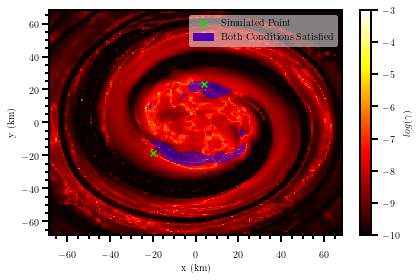

In [130]:
#see contours at z=zval
zval=13
colorplot=plt.pcolormesh(x_km[:,:,zval],y_km[:,:,zval],np.log10(optimal_adiabaticity[:,:,zval]),cmap=plt.cm.hot,shading='auto', vmax=-3, vmin=-10)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.colorbar(label=r'$log(\gamma)$')
contourf=plt.contourf(x_km[:,:,zval],y_km[:,:,zval],both_conditions[:,:,zval], alpha=0.5, levels=[0.5,1], colors=['blue'] )
proxy = [plt.Rectangle((1, 1), 2, 2, fc=pc.get_facecolor()[0]) for pc in
contourf.collections]

#mpl.pyplot.tick_params(axis='both',which="both", direction="in",top=True,right=True)
mpl.pyplot.minorticks_on()
scatter=plt.scatter(coords(optimal_adiabaticity,zval,1e-4)[0],coords(optimal_adiabaticity,zval,1e-4)[1],color=[0,0.9,0], marker='x', label='Simulated Point')
red_patch = mpatches.Patch(color=[0.3,0,0.7], label='The red data')
plt.legend(handles=[scatter,red_patch], labels=["Simulated Point","Both Conditions Satisfied"], frameon = 1, framealpha=0.5)
plt.tight_layout()
plt.savefig('../'+str(zval)+'.png', dpi=300)

In [ ]:
#see contours at z=zval
zval=13
colorplot=plt.pcolormesh(x_km[:,:,zval],y_km[:,:,zval],np.log10(optimal_adiabaticity[:,:,zval]),cmap=plt.cm.hot,shading='auto', vmax=-3, vmin=-10)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.colorbar(label=r'$log(\gamma)$')
contourf=plt.contourf(x_km[:,:,zval],y_km[:,:,zval],both_conditions[:,:,zval], alpha=0.45, levels=[0.5,1], colors=['blue'] )
proxy = [plt.Rectangle((1, 1), 2, 2, fc=pc.get_facecolor()[0]) for pc in
contourf.collections]

#mpl.pyplot.tick_params(axis='both',which="both", direction="in",top=True,right=True)
mpl.pyplot.minorticks_on()
scatter=plt.scatter(coords(optimal_adiabaticity,zval,1e-4)[0],coords(optimal_adiabaticity,zval,1e-4)[1],color=[0,0.9,0], marker='x', label='Simulated Point')

red_patch = mpatches.Patch(color=[0.3,0,0.7], label='The red data')
plt.legend(handles=[scatter,red_patch], labels=["Simulated Point","Region of Interest"], frameon = 1, framealpha=0.5)
plt.tight_layout()
plt.savefig('../'+str(zval)+'.png', dpi=300)

In [70]:
#Generate Gif
file_list=[]
for zval in range(0,99):   

    
    colorplot=plt.pcolormesh(x_km[:,:,zval],y_km[:,:,zval],np.log10(optimal_adiabaticity[:,:,zval]),cmap=plt.cm.hot,shading='auto', vmax=-3, vmin=-10)
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.title('z = '+str(zval))
    plt.colorbar(label=r'$log(\gamma)$')
    contourf=plt.contourf(x_km[:,:,zval],y_km[:,:,zval],both_conditions[:,:,zval], alpha=0.5, levels=[0.5,1], colors=['blue'] )
    proxy = [plt.Rectangle((1, 1), 2, 2, fc=pc.get_facecolor()[0]) for pc in
    contourf.collections]

    #mpl.pyplot.tick_params(axis='both',which="both", direction="in",top=True,right=True)
    mpl.pyplot.minorticks_on()
    scatter=plt.scatter(coords(optimal_adiabaticity,zval,1e-4)[0],coords(optimal_adiabaticity,zval,1e-4)[1],color=[0,0.9,0], marker='x', label='Simulated Point')

    red_patch = mpatches.Patch(color=[0.3,0,0.7], label='The red data')
    plt.legend(handles=[scatter,red_patch], labels=["Simulated Point","Both Conditions Satisfied"], frameon = 1, framealpha=0.5)
    plt.tight_layout()
    plt.savefig('../'+str(zval)+'.png', dpi=300)
    
    file_list.append(str(zval)+'.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [71]:
import imageio
# Build GIF
with imageio.get_writer('../data.gif', mode='I', fps=5) as writer:
    for filename in file_list:
        image = imageio.imread('../'+filename)
        writer.append_data(image)
for filename in set(file_list):
    os.remove('../'+filename)

In [142]:
J_merger.shape

(4, 201, 201, 101)

In [424]:
#angular plots
def H_LR_coord(J, basis, coordinate):
    M=sft.M_2flavor
    J_coord=J[:,coordinate[0],coordinate[1],coordinate[2]]
    p_abs=10**7
    S_R = 2**(1./2.)*G*np.transpose(np.array([[2*J_coord,np.zeros_like(J_coord)],[np.zeros_like(J_coord),J_coord]]),(2,0,1))
    S_L = -2**(1./2.)*G*np.transpose(np.array([[2*J_coord,np.zeros_like(J_coord)],[np.zeros_like(J_coord),J_coord]]),(2,1,0))
    S_L_minus = sft.minus(S_L, basis)
    S_R_plus = sft.plus(S_R, basis)
    
    MSl = np.array(np.matmul(np.conj(M),S_L_minus))
    SrM = np.array(np.matmul(S_R_plus,np.conj(M)))
    return (-1/p_abs)*(SrM-MSl)

In [421]:
H_LR1,S_L,MSl,SrM=H_LR_coord(J_merger, sft.Basis(np.pi/2,0),[5,5,5])

In [466]:
H_LR_coord(J_u, sft.Basis(np.pi,1), [5,5,5])

array([[-3.22197202e-13+0.00000000e+00j,  9.10951984e-16+7.27392716e-16j],
       [ 9.10951984e-16-7.27392716e-16j, -1.55237091e-13+0.00000000e+00j]])

In [410]:
(SR.x1 +iSR.x2)m-m(SRt.x1-iSRt.x2)

(6.123233995736766e-17+1j)

In [388]:
np.array([[H_LR_coord(J_plot,sft.Basis(theta,phi),coordinates)[0,0]
            for theta in np.linspace(0,np.pi,200)] for phi in np.linspace(0,2*np.pi,100)])

TypeError: tuple indices must be integers or slices, not tuple

In [461]:
matrix=np.array(100*[[n for n in range(0,200)]])

In [491]:
H_LR_coord(J_plot,sft.Basis(np.pi/2,1),coordinates)

array([[ 4.52318499e-12-0.00000000e+00j, -6.46559280e-15-1.72337965e-14j],
       [-6.46559280e-15+1.72337965e-14j,  2.17930534e-12-0.00000000e+00j]])

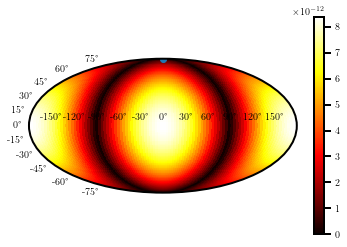

In [488]:
coordinates=[103,134,10]
J_plot=J_merger
H_LR_crit=np.transpose((np.array([[((np.real(H_LR_coord(J_plot,sft.Basis(theta,phi),coordinates)[0,0]))**2+
                                   (np.imag(H_LR_coord(J_plot,sft.Basis(theta,phi),coordinates)[0,0]))**2)**(1/2)
             for theta in np.linspace(0,np.pi,200)] for phi in np.linspace(0,2*np.pi,100)])))
fig=plt.figure()
ax = fig.add_subplot(projection="mollweide")
J_point=J_plot[:,coordinates[0],coordinates[1],coordinates[2]]
im=ax.pcolormesh(np.linspace(-np.pi,np.pi,100), np.linspace(-0.5*np.pi,0.5*np.pi,200), H_LR_crit,cmap=plt.cm.hot,shading='auto')
plt.colorbar(im)
ax.scatter([np.arctan2(J_point[2],J_point[1])],[np.arctan2(J_point[3],(J_point[1]**2+J_point[2]**2)**(1/2))])
#ax.scatter([np.pi/3],[0])



plt.show()

In [ ]:
coordinates=[103,134,95]
J_plot=J_merger
H_LR_crit=np.transpose(np.real(np.array([[H_LR_coord(J_plot,sft.Basis(theta,phi),coordinates)[0,0]
            for theta in np.linspace(0,np.pi,200)] for phi in np.linspace(0,2*np.pi,100)])))
fig=plt.figure()
ax = fig.add_subplot(projection="aitoff")
J_point=J_plot[:,coordinates[0],coordinates[1],coordinates[2]]
im=ax.pcolormesh(np.linspace(-np.pi,np.pi,100), np.linspace(-0.5*np.pi,0.5*np.pi,200), H_LR_crit,cmap=plt.cm.hot,shading='auto')
plt.colorbar(im)
ax.scatter([np.arctan2(J_point[2],J_point[1])],[np.arctan2(J_point[3],(J_point[1]**2+J_point[2]**2)**(1/2))])
ax.scatter([np.pi+np.arctan2(J_point[2],J_point[1])],[-np.arctan2(J_point[3],(J_point[1]**2+J_point[2]**2)**(1/2))])


#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [309]:
J_point=J_u[:,103,134,95]
np.arctan2(J_point[2],J_point[1])

-1.7521168107114542

In [ ]:
Jprojection=np.array([[J*cos(phi)]])

In [ ]:
plt.figure()
ax = plt.subplot(projection="aitoff")
ax.pcolormesh(np.linspace(-np.pi,np.pi,10), np.linspace(-0.5*np.pi,0.5*np.pi,20), H_LR_crit,cmap=plt.cm.hot,shading='auto')
plt.colorbar
#ax.scatter([0],[0])


#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()